<a href="https://colab.research.google.com/github/Antika20/Expert_-Machine-Learning/blob/Proyek_Rekomendasi/Antika_Orinda__Proyek_Rekomendasi_Film_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAMA : ANTIKA ORINDA

# XP : 12.779 

# Path : MLFE 02 SIB Batch 3 

# Submission : Submission 2 MLFE Terapan -> Sistem Rekomendasi Film 

Link dataset :

Moviee lagi : https://www.kaggle.com/datasets/dineshaitham/movies-recommendation-dataset?select=movies.csv

# Import Module yang dibutuhkan 

In [ ]:
# Untuk pengolahan data
from google.colab import files 
import numpy as np
import pandas as pd
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# Untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Install Package Kaggle

In [ ]:
# install kaggle package
!pip install -q kaggle

# Upload JSON Profile Kaggle 

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"antikaorinda","key":"4eff175b8f61192de087d150bebd4735"}'}

# Buat direktori dan ubah izin JSON Kaggle 

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# Download Dataset langsung dari Kaggle 

In [ ]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d dineshaitham/movies-recommendation-dataset

  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 110MB/s]


# Unzip File 

In [ ]:
# Unzip File 
!unzip /content/movies-recommendation-dataset.zip

Archive:  /content/movies-recommendation-dataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


# Memuat Dataset kedalam dataframe menggunakan Pandas dan mencari nilai unik pada movieId dan userId

In [ ]:
import pandas as pd

movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')

print('Jumlah List Movie yang tersedia : ', len(movies.movieId.unique()))
print('Jumlah data Id User yanng terdaftar : ', len(ratings.userId.unique()))


Jumlah List Movie yang tersedia :  9742
Jumlah data Id User yanng terdaftar :  610


# Mengecek Informasi dari Dataset Movie

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


# Menampilkan dataframe dataset 

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# Mengecek Informasi dari Dataset rating

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Mencari nilai unik dan mencetaknya 

In [ ]:
print('Banyaknya userId yang terdaftar : ', len(ratings.userId.unique()))
print('banyaknya id movie yang tersedia : ', len(ratings.movieId.unique()))
print('Banyak rating movie yang tersedia : ', len(ratings.rating.unique()))
print('rating judul film yang tersedia : ', ratings.rating.unique())


print('Banyak id movie yang tersedia : ', len(movies.movieId.unique()))
print('Jenis genres film yang tersedia : ', len(movies.genres.unique()))
print('judul film yang tersedia : ', movies.title.unique())

Banyaknya userId yang terdaftar :  610
banyaknya id movie yang tersedia :  9724
Banyak rating movie yang tersedia :  10
rating judul film yang tersedia :  [4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]
Banyak id movie yang tersedia :  9742
Jenis genres film yang tersedia :  951
judul film yang tersedia :  ['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Flint (2017)' 'Bungo Stray Dogs: Dead Apple (2018)'
 'Andrew Dice Clay: Dice Rules (1991)']


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Mencari nilai missing value

In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Menghapus kolom yang tidak berguna

In [ ]:
ratings.drop('timestamp',axis=1,inplace= True)

In [ ]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Menampilkan total dari setiap genre

In [ ]:
count_genre = pd.DataFrame(movies['genres'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(count_genre))
pd.options.display.max_colwidth = 500
count_genre.head()

951


,genre,count
0,Drama,1053
1,Comedy,946
2,Comedy|Drama,435
3,Comedy|Romance,363
4,Drama|Romance,349


# Menggabungkan dataframe rating dengan movie berdasarkan nilai movieID

In [ ]:
# Menggabungkan dataframe rating dengan movies berdasarkan nilai movieID
movie = pd.merge(movies, ratings , on='movieId', how='left')
movie

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


# Cek missing value dengan fungsi isnull

In [ ]:
# Cek missing value dengan fungsi isnull()
movie.isnull().sum()

movieId     0
title       0
genres      0
userId     18
rating     18
dtype: int64

# Membersihkan missing value dengan fungsi dropna()

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
movie_clean = movie.dropna()
movie_clean

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


# Mengecek kembali missing value pada variabel all_movie_clean

In [ ]:
# Mengecek kembali missing value pada variabel all_resto_clean
movie_clean.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

# Menampilkan informasi dataset

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100854 entries, 0 to 100853
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100854 non-null  int64  
 1   title    100854 non-null  object 
 2   genres   100854 non-null  object 
 3   userId   100836 non-null  float64
 4   rating   100836 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ MB


# Membagi dataset menjadi 2 fitur yaitu numerik dan kategori 

In [ ]:
numerical_features = ['userId','movieId','rating'] 
categorical_features = ['title','genres']

# Menampilkan jumlah sampel dan persentase pada fitur kategori

In [ ]:
feature = categorical_features[0]
count1 = movie[feature].value_counts()
percent = 100*movie[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count1, 'persentase':percent.round(1)})
print(df1)


                                       jumlah sampel  persentase
Forrest Gump (1994)                              329         0.3
Shawshank Redemption, The (1994)                 317         0.3
Pulp Fiction (1994)                              307         0.3
Silence of the Lambs, The (1991)                 279         0.3
Matrix, The (1999)                               278         0.3
...                                              ...         ...
Pride (2007)                                       1         0.0
We're Back! A Dinosaur's Story (1993)              1         0.0
Black Book (Zwartboek) (2006)                      1         0.0
Are We Done Yet? (2007)                            1         0.0
Andrew Dice Clay: Dice Rules (1991)                1         0.0

[9737 rows x 2 columns]


In [ ]:
feature = categorical_features[1]
count = movie[feature].value_counts()
percent = 100*movie[feature].value_counts(normalize=True)
df2 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df2)


                                     jumlah sampel  persentase
Comedy                                        7197         7.1
Drama                                         6294         6.2
Comedy|Romance                                3968         3.9
Comedy|Drama|Romance                          3001         3.0
Comedy|Drama                                  2851         2.8
...                                            ...         ...
Animation|Drama|Romance|Sci-Fi                   1         0.0
Action|Comedy|Drama|Horror|Thriller              1         0.0
Horror|Thriller|IMAX                             1         0.0
Fantasy|Mystery|Western                          1         0.0
Action|Animation|Comedy|Fantasy                  1         0.0

[951 rows x 2 columns]


#Memvisualisasikan fitur numerik

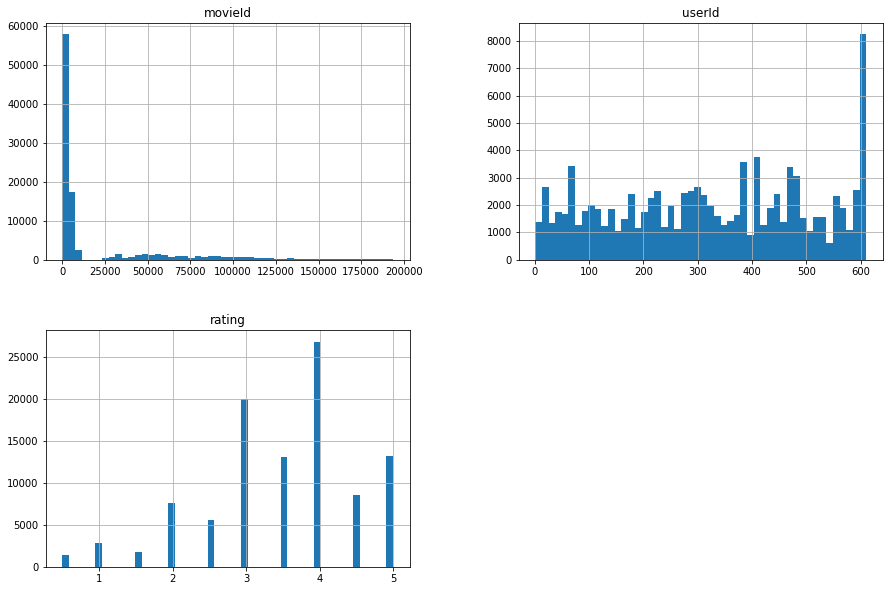

In [ ]:
movie.hist(bins=50, figsize=(15,10))
plt.show()

# Mengurutkan resto berdasarkan movieID kemudian memasukkannya ke dalam variabel fix_movie

In [ ]:
# Mengurutkan resto berdasarkan movieID kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = movie_clean.sort_values('movieId', ascending=True)
fix_movie

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
137,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,382.0,4.5
138,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,385.0,4.0
139,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,389.0,5.0
140,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,391.0,3.0
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


# Mengecek berapa jumlah fix_movie

In [ ]:
# Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

9724

# Mengecek kategori movie yang unik

In [ ]:
# Mengecek kategori movie yang unik
fix_movie.title.unique()

array(['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)',
       ..., 'Flint (2017)', 'Bungo Stray Dogs: Dead Apple (2018)',
       'Andrew Dice Clay: Dice Rules (1991)'], dtype=object)

# Membuang data duplikat pada variabel preparation

In [ ]:
# Membuang data duplikat pada variabel preparation
preparation_movie = fix_movie.drop_duplicates('movieId')
preparation_movie

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
286,2,Jumanji (1995),Adventure|Children|Fantasy,436.0,4.0
362,3,Grumpier Old Men (1995),Comedy|Romance,448.0,3.0
381,4,Waiting to Exhale (1995),Comedy|Drama|Romance,262.0,1.0
411,5,Father of the Bride Part II (1995),Comedy,353.0,3.0
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5
100851,193585,Flint (2017),Drama,184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5


# Mengonversi data series movieId, title, genre menjadi dalam bentuk list

In [ ]:
# Mengonversi data series ‘movieID’ menjadi dalam bentuk list
movie_id = preparation_movie['movieId'].tolist()
 
# Mengonversi data series ‘title’ menjadi dalam bentuk list
title_movie = preparation_movie['title'].tolist()
 
# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres_movie = preparation_movie['genres'].tolist()
 
print(len(movie_id))
print(len(title_movie))
print(len(genres_movie))

9724
9724
9724


# Membuat dictionary untuk data movieId, title, genre

In [ ]:
# Membuat dictionary untuk data ‘movie_ID’, ‘title_Movie’, dan ‘genres_Movie’
movie_new = pd.DataFrame({
    'movie_ID': movie_id,
    'title_Movie': title_movie,
    'genres_Movie': genres_movie
})
movie_new

,movie_ID,title_Movie,genres_Movie
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
data = movie_new
data.sample(5)

,movie_ID,title_Movie,genres_Movie
1035,1348,"Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)",Horror
9190,151687,Risen (2016),Children|Drama
7408,80727,Middle Men (2009),Comedy|Crime|Drama
8648,121231,It Follows (2014),Horror
2704,3633,On Her Majesty's Secret Service (1969),Action|Adventure|Romance|Thriller


# Menampilkan wordcloud untuk data genre dan title

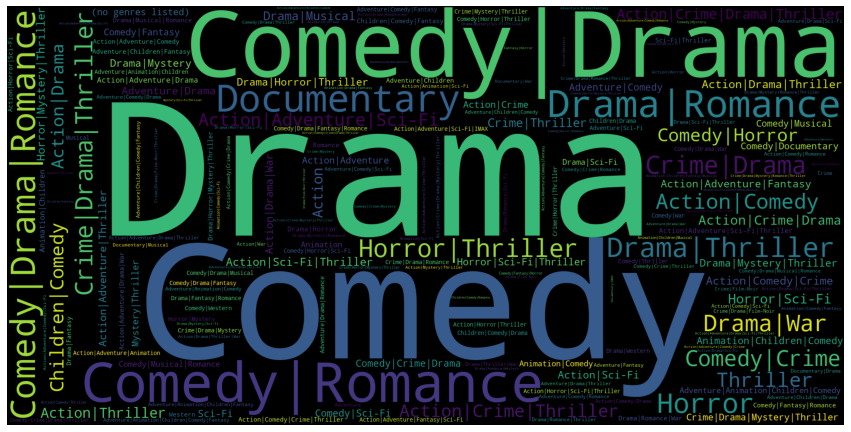

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

word_could_dict=Counter(genres_movie)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

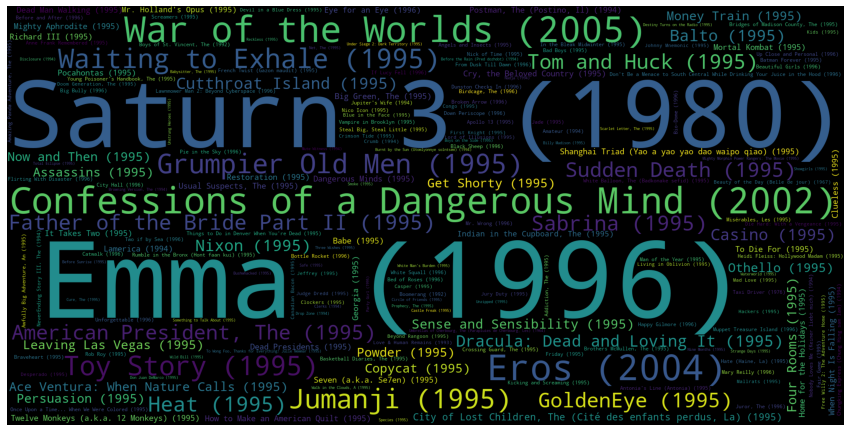

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

word_could_dict=Counter(title_movie)
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Melakukan Teknik TF-IDF Vectorizer untuk menemukan representasi fitur penting dari setiap kategori movie dan genre

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine 
tf.fit(data['title_Movie'])


# Mapping array dari fitur index integer  ke fitur nama 
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '007',
 '01',
 '04',
 '06',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '102',
 '10th',
 '11',
 '1138',
 '11th',
 '12',
 '120',
 '127',
 '13',
 '13th',
 '14',
 '1408',
 '1492',
 '15',
 '16',
 '1600',
 '17',
 '174',
 '1776',
 '18',
 '187',
 '19',
 '1900',
 '1902',
 '1903',
 '1908',
 '1915',
 '1916',
 '1917',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '19

 # Melakukan fit lalu ditransformasikan ke bentuk matriks kemudian Melihat ukuran matriks tfidf

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matriks 
tfidf_matrix = tf.fit_transform(data['title_Movie'])

# Melihat ukuran matriks tfidf
tfidf_matrix.shape 

(9724, 9253)

# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Membuat dataframe untuk melihat tf-idf matrix

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis get_names
# Baris diisi dengan nama title_Movie
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.title_Movie
).sample(22, axis=1).sample(10, axis=0)

,atragon,sally,year,conan,jima,harvey,before,1987,dansu,snogging,...,1989,fears,avonlea,brood,mooseport,afternoon,hitch,flipped,feast,tekkonkinkreet
title_Movie,,,,,,,,,,,,,,,,,,,,,
12 Chairs (1971),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dumbo (1941),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Steal Big, Steal Little (1995)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Glory Daze (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Babylon 5: Thirdspace (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coneheads (1993),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ParaNorman (2012),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Good Will Hunting (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tarantula (1955),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity

# Menghitung cosine similarity pada matrix tf-idf

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.1872586 , 0.13384488, ..., 0.        , 0.        ,
        0.        ],
       [0.1872586 , 1.        , 0.1469799 , ..., 0.        , 0.        ,
        0.        ],
       [0.13384488, 0.1469799 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa movie kemudian melihat similarity matrix pada setiap movie

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa movie
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['genres_Movie'], columns=data['title_Movie'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap movie
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9724, 9724)


title_Movie,Sicario (2015),The Fundamentals of Caring (2016),Waking Life (2001),Pacific Rim (2013),"Substitute, The (1996)"
genres_Movie,,,,,
Drama,0.0,0.000000,0.371983,0.000000,0.000000
Action|Animation,0.0,0.000000,0.000000,0.000000,0.000000
Drama|Musical,0.0,0.000000,0.000000,0.000000,0.000000
Comedy|Romance,0.0,0.020262,0.000000,0.000000,0.147957
Action|Adventure|Fantasy,0.0,0.026985,0.000000,0.000000,0.037115
Action|Comedy|Crime,0.0,0.023206,0.000000,0.000000,0.031917
Drama,0.0,0.000000,0.000000,0.000000,0.000000
Action|Crime|Drama,0.0,0.000000,0.000000,0.000000,0.000000
Adventure|Children|Fantasy,0.0,0.042605,0.000000,0.099018,0.000000


# Mendapatkan rekomendasi

In [ ]:
def movie_recommendations(title_Movie, similarity_data=cosine_sim_df, items=data[['title_Movie', 'genres_Movie']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title_Movie].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title_Movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

# Rekomendasi berdasarkan film

In [ ]:
data[data.title_Movie.eq('The Greatest Showman (2017)')]

,movie_ID,title_Movie,genres_Movie
9638,180985,The Greatest Showman (2017),Drama


# Rekomendasi berdasarkan genre

In [ ]:
data[data.genres_Movie.eq('Drama')]

,movie_ID,title_Movie,genres_Movie
13,14,Nixon (1995),Drama
25,26,Othello (1995),Drama
30,31,Dangerous Minds (1995),Drama
36,40,"Cry, the Beloved Country (1995)",Drama
39,43,Restoration (1995),Drama
...,...,...,...
9638,180985,The Greatest Showman (2017),Drama
9654,182793,The Purple Sea (2009),Drama
9709,190213,John From (2015),Drama
9710,190215,Liquid Truth (2017),Drama


# list Rekomendasi berdasarkan  genre yang mirip 

In [ ]:
indices = pd.Series(index = data['genres_Movie'], data = data.index).drop_duplicates()
indices.head()

genres_Movie
Adventure|Animation|Children|Comedy|Fantasy    0
Adventure|Children|Fantasy                     1
Comedy|Romance                                 2
Comedy|Drama|Romance                           3
Comedy                                         4
dtype: int64

# List rekomendasi berdasarkan kemiripan dengan judul film 

In [ ]:
rekomendasi = pd.DataFrame(movie_recommendations('The Greatest Showman (2017)'))
rekomendasi

,title_Movie,genres_Movie
0,World's Greatest Dad (2009),Comedy|Drama
1,"Greatest Game Ever Played, The (2005)",Drama
2,"Greatest Story Ever Told, The (1965)",Drama
3,The House (2017),Comedy
4,It (2017),Horror


# list  jumlah genre yang mirip atau serupa

In [ ]:
value = pd.DataFrame(rekomendasi['genres_Movie'].value_counts().reset_index().values, columns = ['genres_Movie', 'count'])
value.head()

,genres_Movie,count
0,Drama,2
1,Comedy|Drama,1
2,Comedy,1
3,Horror,1


# Evaluasi model 

In [ ]:
TP = 5 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%


# Model Development dengan Collaborative Filtering

# Import library 

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Data understanding pada ratings csv

In [ ]:
# Membaca dataset
 
df = ratings
df

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


# Menyandikan (encode) fitur ‘userID ’ dan ’ movieID’ ke dalam indeks integer dengan cara mengubah userID dan movie menjadi list tanpa nilai yang sama, melakukan encoding userID dan movieID serta melakukan proses encoding angka ke userID dan movieID

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama 

user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding userID 
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# melakukan proses encoding angka ke userID 
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama 

movie_ids = df['movieId'].unique().tolist()
print('list movieID: ', movie_ids)

# melakukan encoding userID 
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieID : ', movie_to_movie_encoded)

# melakukan proses encoding angka ke userID 
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieID: ', movie_encoded_to_movie)

list movieID:  [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641

In [ ]:
# Mengubah movieID menjadi list tanpa nilai yang sama 
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieID 
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
 
# Melakukan proses encoding angka ke movieID
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Memetakan ‘userID’ dan ‘movieID’ ke dataframe yang berkaitan.

In [ ]:
# Mapping userID ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

# Mengecek beberapa hal dalam data seperti jumlah user, jumlah movie, kemudian mengubah nilai rating menjadi float, mendapatkan nilai rating minimum dan maximum

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah resto
num_movie = len(movie_encoded_to_movie)
print(num_movie)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of Resto: 9724, Min Rating: 0.5, Max Rating: 5.0


# Mengacak dataset agar distribusi menjadi random

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value dan y untuk membuat rating dari hasil Kemudian melakukan Pembagian data menjadi data training dan validasi

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'movie']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


# pembuatan model untuk  menghitung skor kecocokan antara pengguna dan movie dengan teknik embedding.

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings resto
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2) 
 
    x = dot_user_movie + user_bias + movie_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

# proses compile pada model

In [ ]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# proses training model 

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
10084/10084 [==============================] - 51s 4ms/step - loss: 0.6265 - root_mean_squared_error: 0.2220 - val_loss: 0.6127 - val_root_mean_squared_error: 0.2062
Epoch 2/100
10084/10084 [==============================] - 44s 4ms/step - loss: 0.6049 - root_mean_squared_error: 0.1985 - val_loss: 0.6088 - val_root_mean_squared_error: 0.2017
Epoch 3/100
10084/10084 [==============================] - 42s 4ms/step - loss: 0.6000 - root_mean_squared_error: 0.1928 - val_loss: 0.6074 - val_root_mean_squared_error: 0.1998
Epoch 4/100
10084/10084 [==============================] - 42s 4ms/step - loss: 0.5975 - root_mean_squared_error: 0.1898 - val_loss: 0.6075 - val_root_mean_squared_error: 0.1999
Epoch 5/100
10084/10084 [==============================] - 45s 4ms/step - loss: 0.5959 - root_mean_squared_error: 0.1879 - val_loss: 0.6064 - val_root_mean_squared_error: 0.1987
Epoch 6/100
10084/10084 [==============================] - 42s 4ms/step - loss: 0.5944 - root_mean_squared_err

# Membuat kelas untuk mengambil sampel user secara acak dan definisikan variabel movie_not_visited sebagai sebagai daftar movie untuk direkomendasikan pada pengguna.

In [ ]:
movie_df = movie_new
df = pd.read_csv('ratings.csv')
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId== user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['movie_ID'].isin(movie_visited_by_user.userId.values)]['movie_ID'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

In [ ]:

movie_df = movie_new
df = pd.read_csv('ratings.csv')
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId== user_id]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
movie_not_visited = movie_df[~movie_df['movie_ID'].isin(movie_visited_by_user.userId.values)]['movie_ID'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

# memperoleh rekomendasi restoran, gunakan fungsi model.predict() dari library Keras

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-20:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(movie))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)
 
top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
movie_df_rows = movie_df[movie_df['movie_ID'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title_Movie, ':', row.genres_Movie)
 
print('----' * 8)
print('Top 20 movie recommendation')
print('----' * 8)
 
recommended_movie = movie_df[movie_df['movie_ID'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title_Movie, ':', row.genres_Movie)

Showing recommendations for users:         movieId                                      title  \
0             1                           Toy Story (1995)   
1             1                           Toy Story (1995)   
2             1                           Toy Story (1995)   
3             1                           Toy Story (1995)   
4             1                           Toy Story (1995)   
...         ...                                        ...   
100849   193581  Black Butler: Book of the Atlantic (2017)   
100850   193583               No Game No Life: Zero (2017)   
100851   193585                               Flint (2017)   
100852   193587        Bungo Stray Dogs: Dead Apple (2018)   
100853   193609        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  
0       Adventure|Animation|Children|Comedy|Fantasy     1.0     4.0  
1       Adventure|Animation|Children|Comedy|Fantasy     5.0     4.0  
2       Ad

# Visualisasi plot metrik evaluasi dengan matplotlib

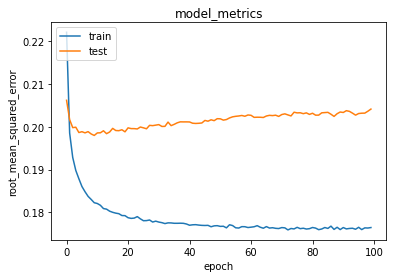

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluasi model 

In [ ]:
model.evaluate(x,y)

3152/3152 [==============================] - 9s 3ms/step - loss: 0.6222 - root_mean_squared_error: 0.2143


[0.6221619844436646, 0.21431681513786316]

Observasi :
Pada gambar diatas  menunjukkan bahwa model mempunyai nilai _root_mean_squared_error sebesar 0.21 dengan nilai loss yang diperoleh sebanyak 0.62 , hasil tersebut sudah cukup bagus karena dengan nilai root_mean_squared_error sebesar 0.21 berarti perbedaan nilai dari prediksi sebuah model sebagai estimasi atas nilai yang diobservasi sebesar 0.21